**DOWNLOAD THE DATASET**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_location = "/content/drive/MyDrive/spam.csv"

**IMPORTED LIBRARIES**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

**READING THE DATASET**

In [5]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**PRE-PROCESSING THE DATSET**

In [6]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [8]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [10]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

**CREATE  MODEL AND ADD LAYER**

In [11]:
inputs = Input(shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(128)(layer)
layer = Dense(128)(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1)(layer)
layer = Activation('sigmoid')(layer)
model = Model(inputs=inputs,outputs=layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129   

**COMPILE THE MODEL**

In [12]:
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

**FIT THE MODEL**

In [13]:
history = model.fit(sequences_matrix,Y_train,batch_size=0,epochs=10,
          validation_split=0.2)

Epoch 1/10
112/112 [==============================] - 27s 213ms/step - loss: 0.2181 - accuracy: 0.9318 - val_loss: 0.0505 - val_accuracy: 0.9854
Epoch 2/10
112/112 [==============================] - 25s 223ms/step - loss: 0.0440 - accuracy: 0.9865 - val_loss: 0.0408 - val_accuracy: 0.9877
Epoch 3/10
112/112 [==============================] - 24s 212ms/step - loss: 0.0267 - accuracy: 0.9930 - val_loss: 0.0351 - val_accuracy: 0.9910
Epoch 4/10
112/112 [==============================] - 24s 212ms/step - loss: 0.0183 - accuracy: 0.9950 - val_loss: 0.0360 - val_accuracy: 0.9933
Epoch 5/10
112/112 [==============================] - 24s 211ms/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0.0499 - val_accuracy: 0.9865
Epoch 6/10
112/112 [==============================] - 23s 209ms/step - loss: 0.0091 - accuracy: 0.9980 - val_loss: 0.0410 - val_accuracy: 0.9899
Epoch 7/10
112/112 [==============================] - 24s 211ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.0479 - val_ac

In [14]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

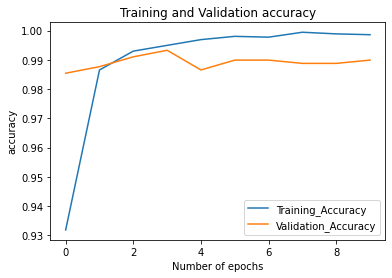

In [15]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

**SAVE THE MODEL**

In [16]:
model.save('Spam_sms_classifier.h5')

In [17]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

**TEST THE MODEL**

In [18]:
accuracy1 = model.evaluate(test_sequences_matrix,Y_test)

35/35 [==============================] - 3s 73ms/step - loss: 0.1299 - accuracy: 0.9830


In [19]:
print(' Accuracy: {:0.3f}'.format(accuracy1[0],accuracy1[1]))

 Accuracy: 0.130
